<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-12-02 17:37:44.623886


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [10]:
def us_details():
    population = pop['Population'].sum()
    confirmed = us['confirmed'].sum()
    deaths = us['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('US Confirmed Cases')
    ax1.axis('equal')

    plt.show()

    print('US Population')
    print(pop['Population'].sum())
    print('US Confirmed')
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('US Deaths')
    print(us['deaths'].sum())
    print('')

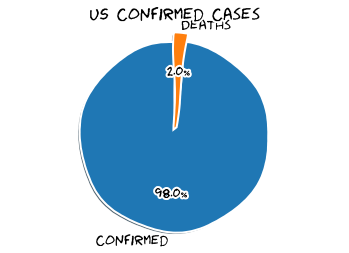

US Population
330362592
US Confirmed
13751282 (4.162481568131056% of population)
US Deaths
270516

New York City Confirmed
314548 (3.772998735608566% of population)
New York City Deaths
24252

Philippines Confirmed
434357
Philippines Deaths
8436



In [11]:
# quick summary
us_details()

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[(ny['admin2'] == 'Queens') | (ny['admin2'] == 'Kings') | (ny['admin2'] == 'New York') | (ny['admin2'] == 'Bronx') | (ny['admin2'] == 'Richmond')]
nyc_confirmed = nyc['confirmed'].sum()
nyc_deaths = nyc['deaths'].sum()
# from https://www.census.gov/quickfacts/newyorkcitynewyork
nyc_population = 8336817

nyc_confirmed_perc_of_pop = (nyc_confirmed/nyc_population) * 100
nyc_deaths_perc_of_confirmed = (nyc_deaths/nyc_confirmed) * 100

print('New York City Confirmed')
print('{0} ({1}% of population)'.format(nyc_confirmed, nyc_confirmed_perc_of_pop))
print('New York City Deaths')
print(nyc_deaths)
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

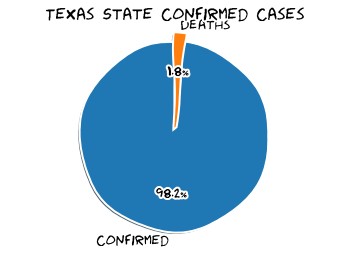

Texas State Total Population
28701845
Texas State Confirmed
1252120 (4.362507009566807% of population)
Texas State Deaths
22118 (1.7664441107881033% of confirmed)



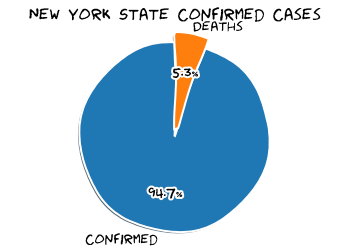

New York State Total Population
19542209
New York State Confirmed
655265 (3.3530753867180527% of population)
New York State Deaths
34501 (5.265198049644037% of confirmed)



In [12]:
state_details('Texas')
state_details('New York')

In [13]:
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
10,New York,US,1606926388000,40.710881,-73.816847,91056,0,7356,83700,Queens,36081,"Queens, New York, US",4040.006070,None,None,84036081,USA
11,New York,US,1606926388000,40.636182,-73.949356,89751,0,7509,82242,Kings,36047,"Kings, New York, US",3506.031283,None,None,84036047,USA
23,New York,US,1606926388000,40.852093,-73.862828,64494,0,5024,59470,Bronx,36005,"Bronx, New York, US",4547.573098,None,None,84036005,USA
24,New York,US,1606926388000,40.883201,-72.801217,61681,0,2056,59625,Suffolk,36103,"Suffolk, New York, US",4177.228649,None,None,84036103,USA
25,New York,US,1606926388000,40.740665,-73.589419,61162,0,2260,58902,Nassau,36059,"Nassau, New York, US",4507.400562,None,None,84036059,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2701,New York,US,1606926388000,44.116308,-73.772978,289,0,14,275,Essex,36031,"Essex, New York, US",783.516335,None,None,84036031,USA
2740,New York,US,1606926388000,44.590409,-74.299260,271,0,7,264,Franklin,36033,"Franklin, New York, US",541.761625,None,None,84036033,USA
2747,New York,US,1606926388000,42.635055,-77.103699,269,0,7,262,Yates,36123,"Yates, New York, US",1079.757556,None,None,84036123,USA
2873,New York,US,1606926388000,42.588317,-74.443390,208,0,2,206,Schoharie,36095,"Schoharie, New York, US",670.989387,None,None,84036095,USA


In [14]:
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
10,New York,US,1606926388000,40.710881,-73.816847,91056,0,7356,83700,Queens,36081,"Queens, New York, US",4040.006070,None,None,84036081,USA
11,New York,US,1606926388000,40.636182,-73.949356,89751,0,7509,82242,Kings,36047,"Kings, New York, US",3506.031283,None,None,84036047,USA
23,New York,US,1606926388000,40.852093,-73.862828,64494,0,5024,59470,Bronx,36005,"Bronx, New York, US",4547.573098,None,None,84036005,USA
37,New York,US,1606926388000,40.767273,-73.971526,45871,0,3229,42642,New York,36061,"New York, New York, US",2816.407627,None,None,84036061,USA
114,New York,US,1606926388000,40.585822,-74.148086,23376,0,1134,22242,Richmond,36085,"Richmond, New York, US",4909.449472,None,None,84036085,USA


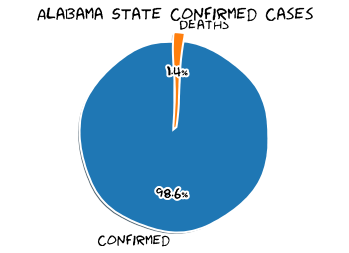

Alabama State Total Population
4887871
Alabama State Confirmed
256776 (5.25333013084838% of population)
Alabama State Deaths
3673 (1.4304296351683958% of confirmed)



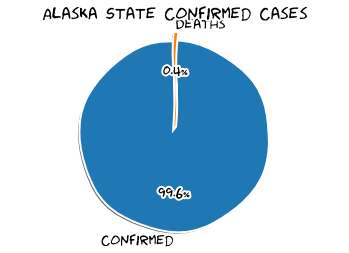

Alaska State Total Population
737438
Alaska State Confirmed
32561 (4.4154220422598245% of population)
Alaska State Deaths
122 (0.3746813672798747% of confirmed)



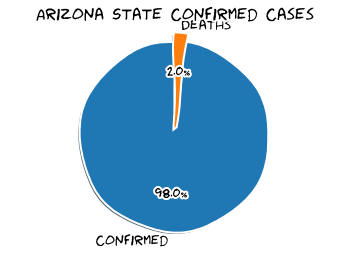

Arizona State Total Population
7171646
Arizona State Confirmed
337139 (4.700998905969424% of population)
Arizona State Deaths
6687 (1.9834548954585498% of confirmed)



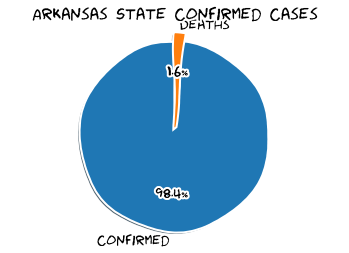

Arkansas State Total Population
3013825
Arkansas State Confirmed
159309 (5.285940623626123% of population)
Arkansas State Deaths
2512 (1.576809847529016% of confirmed)



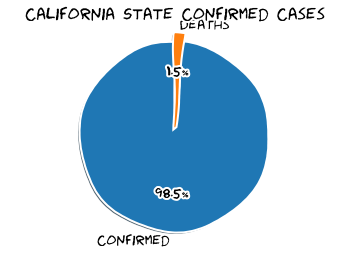

California State Total Population
39557045
California State Confirmed
1251006 (3.1625365342633662% of population)
California State Deaths
19331 (1.5452363937503097% of confirmed)



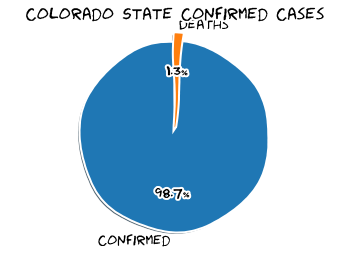

Colorado State Total Population
5695564
Colorado State Confirmed
237310 (4.1665759527941395% of population)
Colorado State Deaths
3109 (1.3101007121486663% of confirmed)



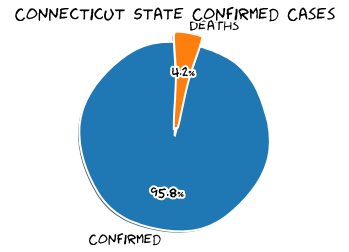

Connecticut State Total Population
3572665
Connecticut State Confirmed
118754 (3.323961244617114% of population)
Connecticut State Deaths
5040 (4.244067568250333% of confirmed)



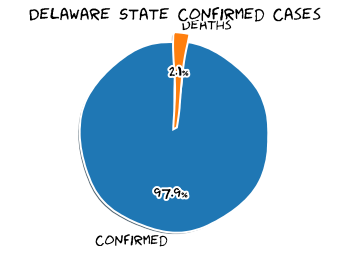

Delaware State Total Population
967171
Delaware State Confirmed
36343 (3.7576602276122832% of population)
Delaware State Deaths
777 (2.1379632941694413% of confirmed)



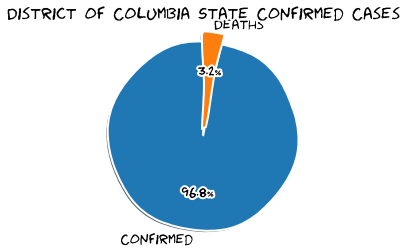

District of Columbia State Total Population
702455
District of Columbia State Confirmed
21842 (3.1093806720715205% of population)
District of Columbia State Deaths
690 (3.1590513689222597% of confirmed)



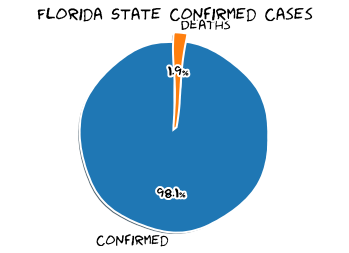

Florida State Total Population
21299325
Florida State Confirmed
1008166 (4.733323708615179% of population)
Florida State Deaths
18679 (1.8527702779105821% of confirmed)



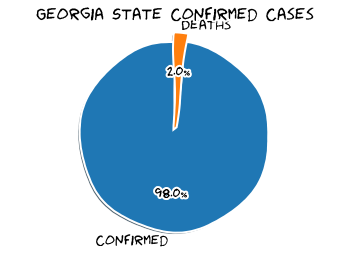

Georgia State Total Population
10519475
Georgia State Confirmed
476405 (4.5287906478222535% of population)
Georgia State Deaths
9515 (1.9972502387674353% of confirmed)



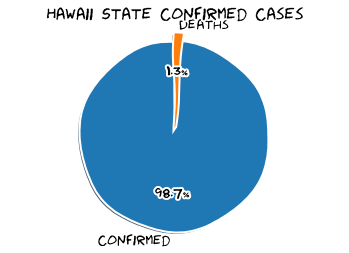

Hawaii State Total Population
1420491
Hawaii State Confirmed
18266 (1.2858933988318122% of population)
Hawaii State Deaths
244 (1.3358151757363408% of confirmed)



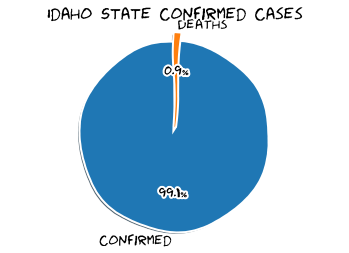

Idaho State Total Population
1754208
Idaho State Confirmed
103305 (5.888982378372462% of population)
Idaho State Deaths
960 (0.9292870625816756% of confirmed)



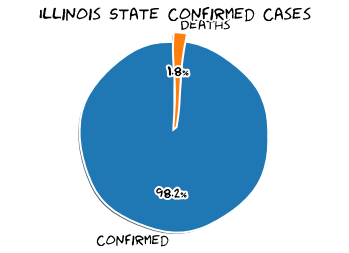

Illinois State Total Population
12741080
Illinois State Confirmed
738846 (5.798927563440462% of population)
Illinois State Deaths
13131 (1.7772309791214949% of confirmed)



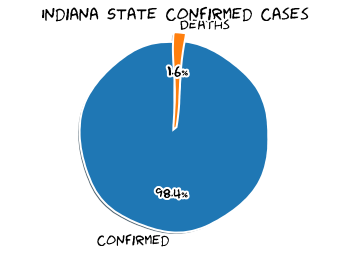

Indiana State Total Population
6691878
Indiana State Confirmed
344373 (5.146133865560609% of population)
Indiana State Deaths
5598 (1.625562979676107% of confirmed)



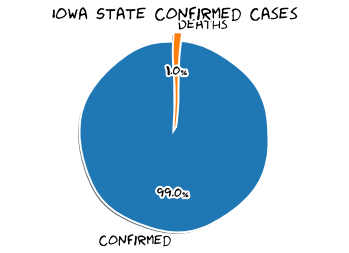

Iowa State Total Population
3156145
Iowa State Confirmed
233866 (7.40986234789593% of population)
Iowa State Deaths
2449 (1.0471808642555993% of confirmed)



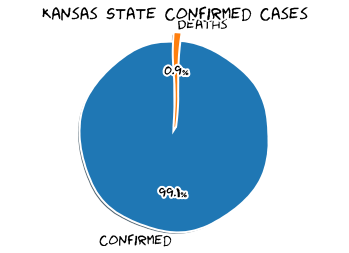

Kansas State Total Population
2911510
Kansas State Confirmed
160233 (5.50343292655701% of population)
Kansas State Deaths
1499 (0.9355126596893274% of confirmed)



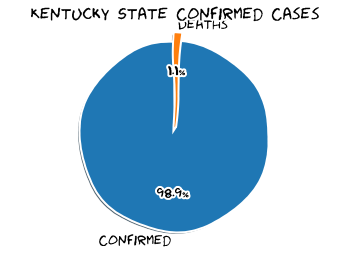

Kentucky State Total Population
4468402
Kentucky State Confirmed
183164 (4.099094038539953% of population)
Kentucky State Deaths
1943 (1.0607979734008866% of confirmed)



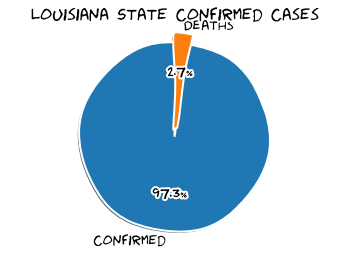

Louisiana State Total Population
4659978
Louisiana State Confirmed
237740 (5.101740823669124% of population)
Louisiana State Deaths
6455 (2.7151510052999073% of confirmed)



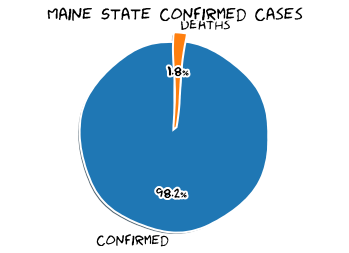

Maine State Total Population
1338404
Maine State Confirmed
12208 (0.912131165178825% of population)
Maine State Deaths
218 (1.7857142857142856% of confirmed)



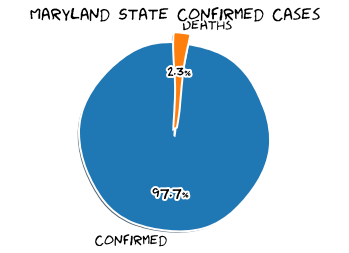

Maryland State Total Population
6042718
Maryland State Confirmed
203355 (3.365290255146773% of population)
Maryland State Deaths
4670 (2.2964766049519314% of confirmed)



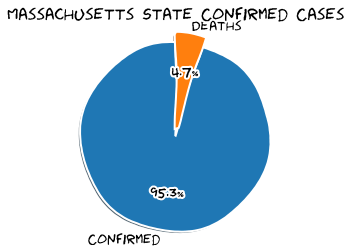

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
229205 (3.320777340506558% of population)
Massachusetts State Deaths
10778 (4.702340699373923% of confirmed)



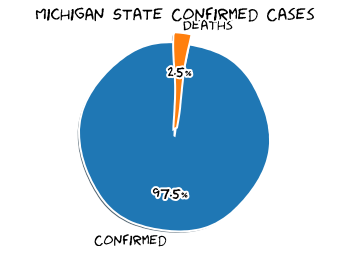

Michigan State Total Population
9995915
Michigan State Confirmed
395453 (3.956146085675999% of population)
Michigan State Deaths
9759 (2.4678027477348765% of confirmed)



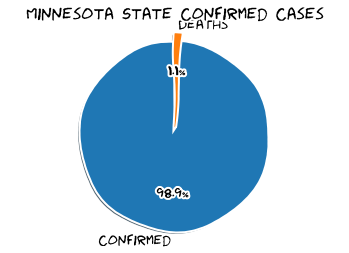

Minnesota State Total Population
5611179
Minnesota State Confirmed
322312 (5.744104759445386% of population)
Minnesota State Deaths
3674 (1.1398892998088808% of confirmed)



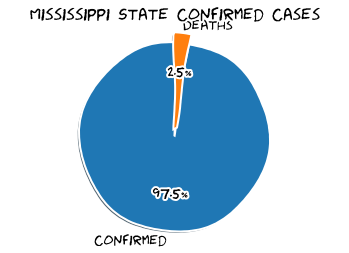

Mississippi State Total Population
2986530
Mississippi State Confirmed
156868 (5.252517135270699% of population)
Mississippi State Deaths
3851 (2.4549302598362956% of confirmed)



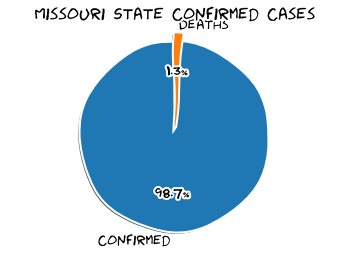

Missouri State Total Population
6126452
Missouri State Confirmed
311952 (5.091886788633944% of population)
Missouri State Deaths
4077 (1.3069318356670256% of confirmed)



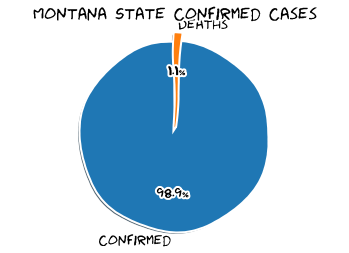

Montana State Total Population
1062305
Montana State Confirmed
63205 (5.949797845251599% of population)
Montana State Deaths
698 (1.10434301083775% of confirmed)



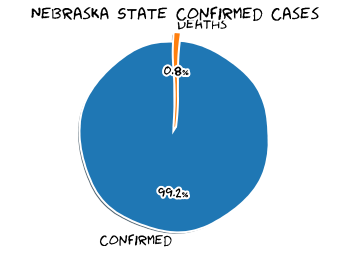

Nebraska State Total Population
1929268
Nebraska State Confirmed
130194 (6.748362591407725% of population)
Nebraska State Deaths
1080 (0.829531314807134% of confirmed)



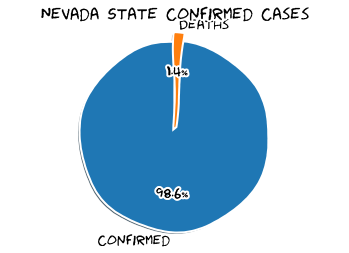

Nevada State Total Population
3034392
Nevada State Confirmed
154842 (5.102900350383207% of population)
Nevada State Deaths
2164 (1.397553635318583% of confirmed)



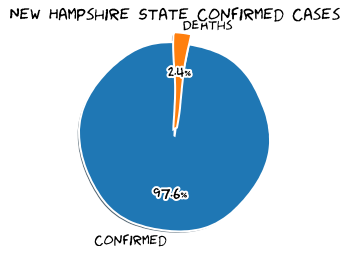

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
21802 (1.6072742392318817% of population)
New Hampshire State Deaths
528 (2.4217961654894045% of confirmed)



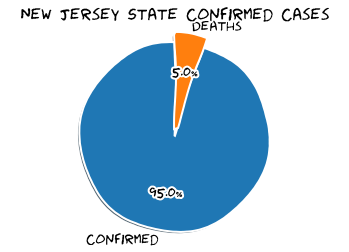

New Jersey State Total Population
8908520
New Jersey State Confirmed
341910 (3.8380112521496277% of population)
New Jersey State Deaths
17083 (4.996344067152174% of confirmed)



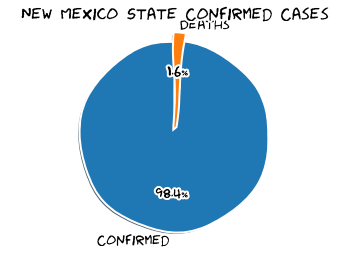

New Mexico State Total Population
2095428
New Mexico State Confirmed
99419 (4.7445676969096535% of population)
New Mexico State Deaths
1589 (1.598286041903459% of confirmed)



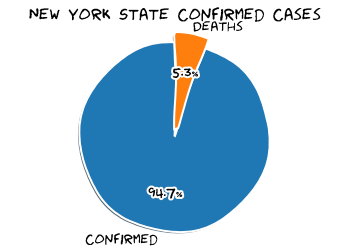

New York State Total Population
19542209
New York State Confirmed
655265 (3.3530753867180527% of population)
New York State Deaths
34501 (5.265198049644037% of confirmed)



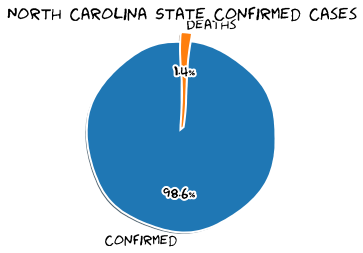

North Carolina State Total Population
10383620
North Carolina State Confirmed
367395 (3.538216922422045% of population)
North Carolina State Deaths
5284 (1.4382340532669198% of confirmed)



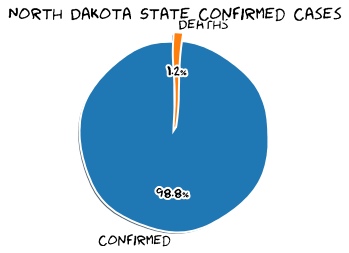

North Dakota State Total Population
760077
North Dakota State Confirmed
80135 (10.543010773908433% of population)
North Dakota State Deaths
965 (1.204217882323579% of confirmed)



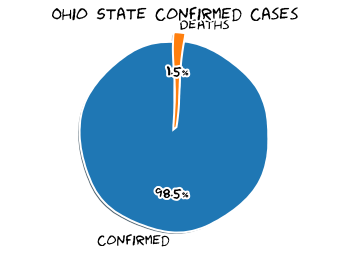

Ohio State Total Population
11689442
Ohio State Confirmed
430093 (3.679328748113041% of population)
Ohio State Deaths
6548 (1.5224614211344987% of confirmed)



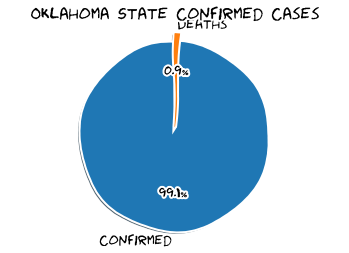

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
199482 (5.059041424227108% of population)
Oklahoma State Deaths
1758 (0.881282521731284% of confirmed)



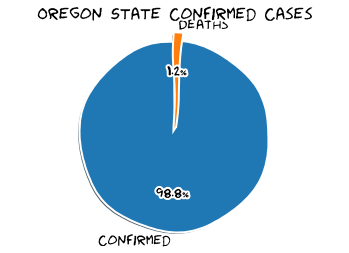

Oregon State Total Population
4190713
Oregon State Confirmed
76654 (1.8291398146329754% of population)
Oregon State Deaths
936 (1.2210713074334019% of confirmed)



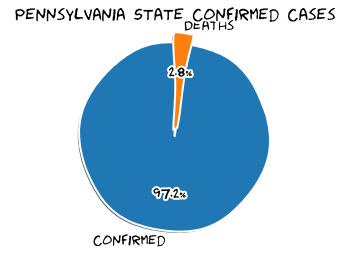

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
379264 (2.961366621222982% of population)
Pennsylvania State Deaths
10671 (2.8136074080323996% of confirmed)



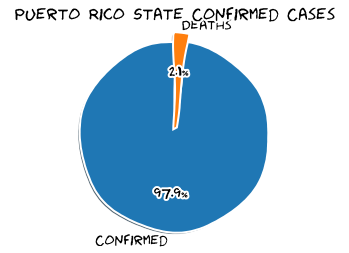

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
53708 (1.6809210701334176% of population)
Puerto Rico State Deaths
1144 (2.1300364936322334% of confirmed)



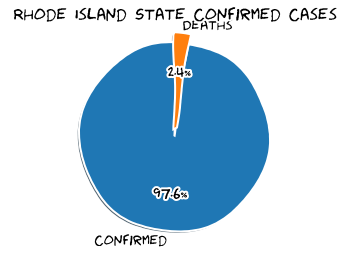

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
57906 (5.476702780155394% of population)
Rhode Island State Deaths
1380 (2.3831727282146926% of confirmed)



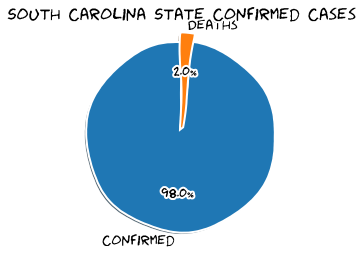

South Carolina State Total Population
5084127
South Carolina State Confirmed
218912 (4.305793305320658% of population)
South Carolina State Deaths
4404 (2.0117672854845785% of confirmed)



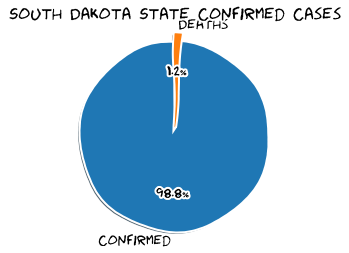

South Dakota State Total Population
882235
South Dakota State Confirmed
80912 (9.171252557425175% of population)
South Dakota State Deaths
948 (1.1716432667589478% of confirmed)



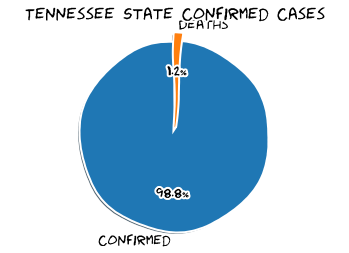

Tennessee State Total Population
6770010
Tennessee State Confirmed
380186 (5.615737642928149% of population)
Tennessee State Deaths
4638 (1.2199291925531188% of confirmed)



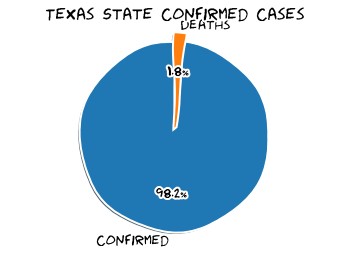

Texas State Total Population
28701845
Texas State Confirmed
1252120 (4.362507009566807% of population)
Texas State Deaths
22118 (1.7664441107881033% of confirmed)



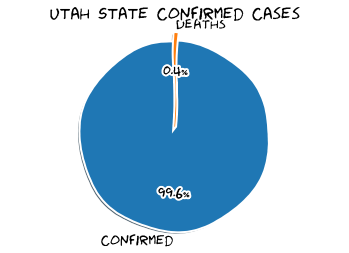

Utah State Total Population
3161105
Utah State Confirmed
198216 (6.270465549230411% of population)
Utah State Deaths
890 (0.44900512572143525% of confirmed)



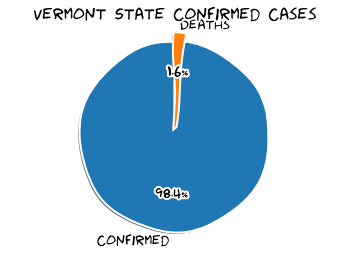

Vermont State Total Population
626299
Vermont State Confirmed
4444 (0.7095652396060028% of population)
Vermont State Deaths
73 (1.6426642664266429% of confirmed)



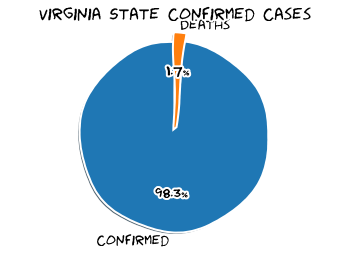

Virginia State Total Population
8517685
Virginia State Confirmed
242480 (2.846782899344129% of population)
Virginia State Deaths
4113 (1.6962223688551634% of confirmed)



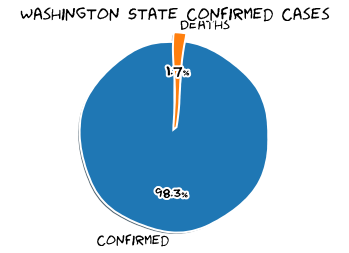

Washington State Total Population
7535591
Washington State Confirmed
167216 (2.2190163983156728% of population)
Washington State Deaths
2805 (1.6774710554013967% of confirmed)



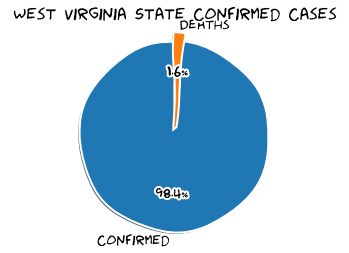

West Virginia State Total Population
1805832
West Virginia State Confirmed
49885 (2.762438587864209% of population)
West Virginia State Deaths
776 (1.5555778290067153% of confirmed)



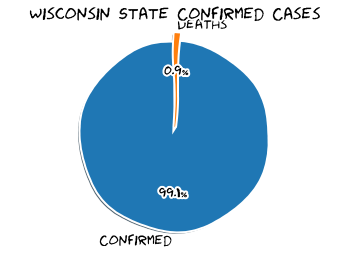

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
416365 (7.161952866122835% of population)
Wisconsin State Deaths
3611 (0.8672679019610198% of confirmed)



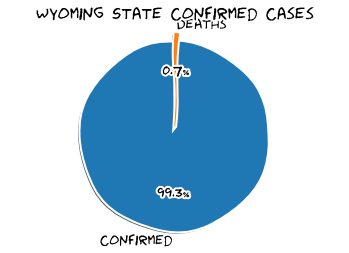

Wyoming State Total Population
577737
Wyoming State Confirmed
33805 (5.851278349837383% of population)
Wyoming State Deaths
230 (0.6803727259281172% of confirmed)



In [15]:
for i in states:
    state_details(i)

In [16]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 64097151},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 1486681},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-12-02T17:26:32.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 41249718},
 'source': 'https://github.com/mathdroid/covid19'}

In [17]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [18]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidentRate,caseFatalityRatio
0,,,,Afghanistan,2020-12-02 05:27:41,33.93911,67.709953,46717,1797,36907,8013,Afghanistan,120.00768283446756,3.846565490078558
1,,,,Albania,2020-12-02 05:27:41,41.1533,20.1683,39014,822,19384,18808,Albania,1355.6883730627562,2.1069359717024656
2,,,,Algeria,2020-12-02 05:27:41,28.0339,1.6596,84152,2447,54405,27300,Algeria,191.90421536837792,2.9078334442437495
3,,,,Andorra,2020-12-02 05:27:41,42.5063,1.5218,6790,76,5940,774,Andorra,8787.937617291143,1.1192930780559647
4,,,,Angola,2020-12-02 05:27:41,-11.2027,17.8739,15251,350,7932,6969,Angola,46.40319977917785,2.294931479902957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3971,,,,West Bank and Gaza,2020-12-02 05:27:41,31.9522,35.2332,88004,747,65938,21319,West Bank and Gaza,1725.089661380291,0.8488250534066634
3972,,,,Western Sahara,2020-12-02 05:27:41,24.2155,-12.8858,10,1,8,1,Western Sahara,1.674116485025028,10.0
3973,,,,Yemen,2020-12-02 05:27:41,15.552727,48.516388,2197,619,1514,64,Yemen,7.36606436377857,28.17478379608557
3974,,,,Zambia,2020-12-02 05:27:41,-13.133897,27.849332,17665,357,17059,249,Zambia,96.08922040500968,2.020945372204925


In [19]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,California,US,1606926388000,34.308284,-118.228241,409015,0,7702,401313,Los Angeles,06037,"Los Angeles, California, US",4074.216960,None,None,84006037,USA
1,Illinois,US,1606926388000,41.841448,-87.816588,310722,0,6695,304027,Cook,17031,"Cook, Illinois, US",6033.163936,None,None,84017031,USA
2,Florida,US,1606926388000,25.611236,-80.551706,231761,0,3839,227922,Miami-Dade,12086,"Miami-Dade, Florida, US",8530.221499,None,None,84012086,USA
3,Arizona,US,1606926388000,33.348359,-112.491815,213121,0,4010,209111,Maricopa,04013,"Maricopa, Arizona, US",4751.423169,None,None,84004013,USA
4,Texas,US,1606926388000,29.858649,-95.393395,192127,0,3013,189114,Harris,48201,"Harris, Texas, US",4076.251903,None,None,84048201,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,Oregon,US,1606926388000,44.726982,-120.028143,5,0,0,5,Wheeler,41069,"Wheeler, Oregon, US",375.375375,None,None,84041069,USA
3236,Texas,US,1606926388000,32.743640,-101.431651,5,0,0,5,Borden,48033,"Borden, Texas, US",764.525994,None,None,84048033,USA
3237,Texas,US,1606926388000,33.616438,-100.255806,2,0,0,2,King,48269,"King, Texas, US",735.294118,None,None,84048269,USA
3238,Idaho,US,1606926388000,NaN,NaN,1,0,0,1,Unassigned,90016,"Unassigned, Idaho, US",NaN,None,None,84090016,USA


In [20]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
10,New York,US,1606926388000,40.710881,-73.816847,91056,0,7356,83700,Queens,36081,"Queens, New York, US",4040.006070,None,None,84036081,USA
11,New York,US,1606926388000,40.636182,-73.949356,89751,0,7509,82242,Kings,36047,"Kings, New York, US",3506.031283,None,None,84036047,USA
23,New York,US,1606926388000,40.852093,-73.862828,64494,0,5024,59470,Bronx,36005,"Bronx, New York, US",4547.573098,None,None,84036005,USA
24,New York,US,1606926388000,40.883201,-72.801217,61681,0,2056,59625,Suffolk,36103,"Suffolk, New York, US",4177.228649,None,None,84036103,USA
25,New York,US,1606926388000,40.740665,-73.589419,61162,0,2260,58902,Nassau,36059,"Nassau, New York, US",4507.400562,None,None,84036059,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2701,New York,US,1606926388000,44.116308,-73.772978,289,0,14,275,Essex,36031,"Essex, New York, US",783.516335,None,None,84036031,USA
2740,New York,US,1606926388000,44.590409,-74.299260,271,0,7,264,Franklin,36033,"Franklin, New York, US",541.761625,None,None,84036033,USA
2747,New York,US,1606926388000,42.635055,-77.103699,269,0,7,262,Yates,36123,"Yates, New York, US",1079.757556,None,None,84036123,USA
2873,New York,US,1606926388000,42.588317,-74.443390,208,0,2,206,Schoharie,36095,"Schoharie, New York, US",670.989387,None,None,84036095,USA


In [21]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

655265

In [22]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3


In [23]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
22,None,Philippines,1606929992000,12.879721,121.774017,434357,399005,8436,26916.0,None,None,Philippines,396.379539,None,None,608,PHL,PH


In [24]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
